In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob


sns.set_style('whitegrid')

In [2]:
metrics_files = glob.glob('**/**.json')
metrics_dicts = []

for file in metrics_files:
    with open(file, 'r') as f:
        if 'roberta' not in file:
            print(file)
            metrics_dicts.append(json.load(f))


sst2/run-metrics.json
tweet_eval/run-metrics.json
imdb/run-metrics.json


In [3]:
sst2_dic = metrics_dicts[0]
tweet_eval_dic = metrics_dicts[1]
imdb_dic = metrics_dicts[2]

In [4]:
def scale_data(values):
    mn = min(values)
    mx = max(values)

    norm = mx - mn

    scaled_values = [(val - mn)/norm for val in values]
    return scaled_values

In [5]:
dicts = [sst2_dic, tweet_eval_dic, imdb_dic]
dict_names = ['sst2_dic', 'tweet_eval_dic', 'imdb_dic']

In [6]:
# fig, axs = plt.subplots(3, 2, figsize=(10, 8))
# for i, dic in enumerate(dicts):
#     ax = axs[i//2, i%2]
#     var_dic = dic['variance_metrics']
#     mod_dic = dic['modelling_metrics']
#     ax.plot(var_dic['subset_sizes'], var_dic['r2_values'], marker='o')
#     ax.plot(var_dic['subset_sizes'], mod_dic['test_accuracies'], marker='o')
#     ax.set_title(dict_names[i])
#     ax.set_xlabel('Subset Sizes')
#     ax.set_ylabel('R2 Values & Test accuracies')

# plt.tight_layout()
# plt.show()

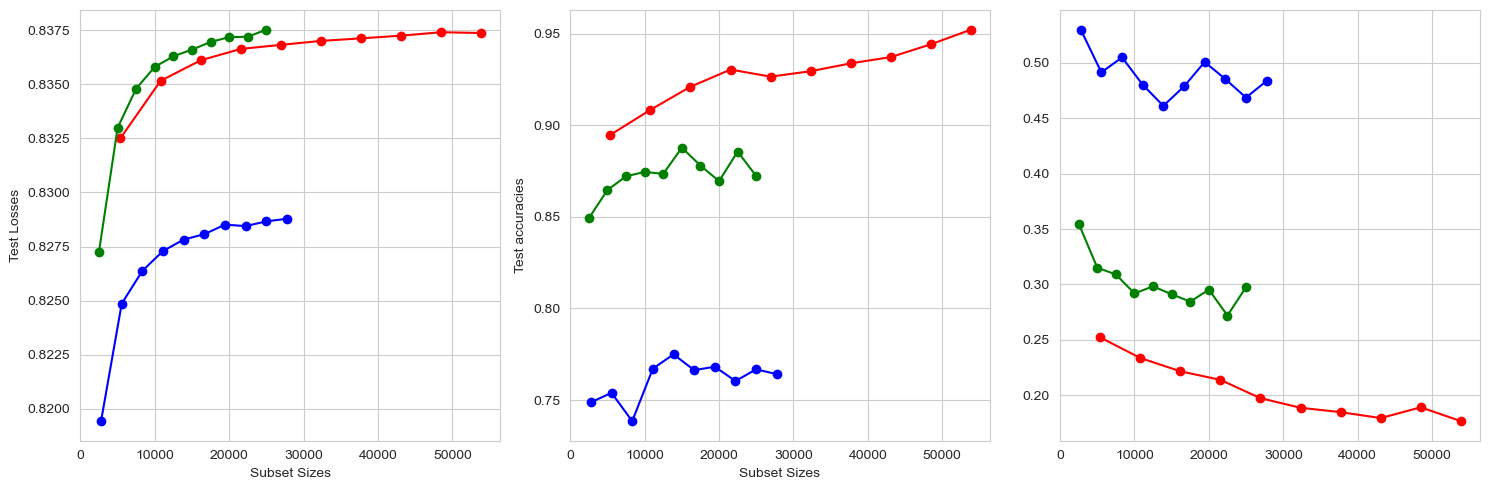

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
color = ["red", "blue", "green", "orange", "purple"]
for i, dic in enumerate(dicts):
    var_dic = dic['variance_metrics']
    mod_dic = dic['modelling_metrics']
    axs[0].plot(var_dic['subset_sizes'], var_dic['r2_values'], marker="o", color=color[i])
    axs[1].plot(var_dic['subset_sizes'], mod_dic['test_accuracies'], marker="o", color=color[i])
    axs[2].plot(var_dic['subset_sizes'], mod_dic['test_losses'], marker="o", color=color[i])

axs[0].set_xlabel('Subset Sizes')
axs[0].set_ylabel('R2 Values')
axs[1].set_xlabel('Subset Sizes')
axs[1].set_ylabel('Test accuracies')
axs[0].set_xlabel('Subset Sizes')
axs[0].set_ylabel('Test Losses')

plt.tight_layout()
plt.show()

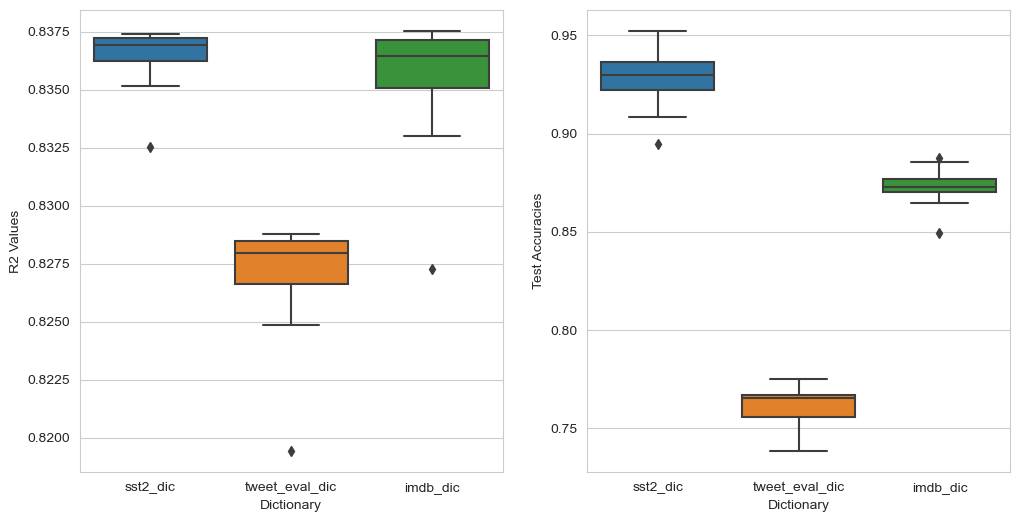

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

data1 = []
data2 = []
for dic, name in zip(dicts, dict_names):
    full_data_len = dic['variance_metrics']['subset_sizes'][-1]
    data1.extend([(name, val, full_data_len) for val in dic['variance_metrics']['r2_values']])
    data2.extend([(name, val, full_data_len) for val in dic['modelling_metrics']['test_accuracies']])
    # data.extend([(name, val*full_data_len) for val in dic['variance_metrics']['r2_values']])
df1 = pd.DataFrame(data1, columns=['Dictionary', 'R2 Values', 'Size'])
df2 = pd.DataFrame(data2, columns=['Dictionary', 'Test Accuracies', 'Size'])
sns.boxplot(x='Dictionary', y='R2 Values', data=df1, ax=axs[0])
sns.boxplot(x='Dictionary', y='Test Accuracies', data=df2, ax=axs[1])
plt.show()

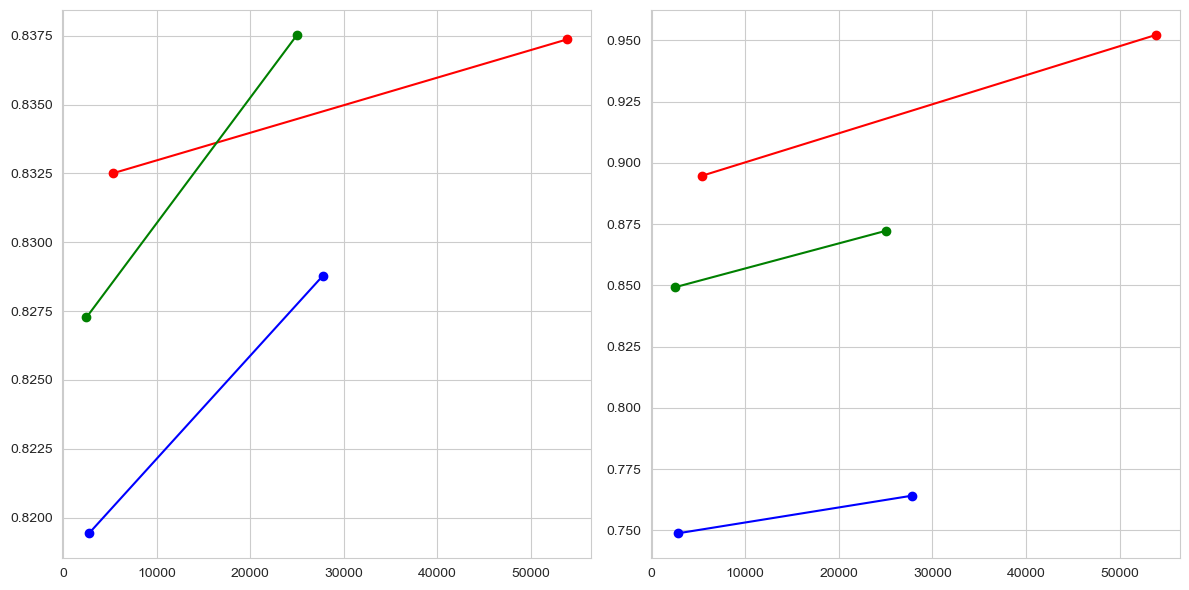

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i, dic in enumerate(dicts):
    var_dic = dic['variance_metrics']
    subset_sizes = [var_dic['subset_sizes'][0], var_dic['subset_sizes'][-1]]
    min_max_r2 = [var_dic['r2_values'][0], var_dic['r2_values'][-1]]

    mod_dic = dic['modelling_metrics']
    min_max_acc = [mod_dic['test_accuracies'][0], mod_dic['test_accuracies'][-1]]

    axs[0].plot(subset_sizes, min_max_r2, marker='o', color=color[i])
    axs[1].plot(subset_sizes, min_max_acc, marker='o', color=color[i])
plt.tight_layout()
plt.show()

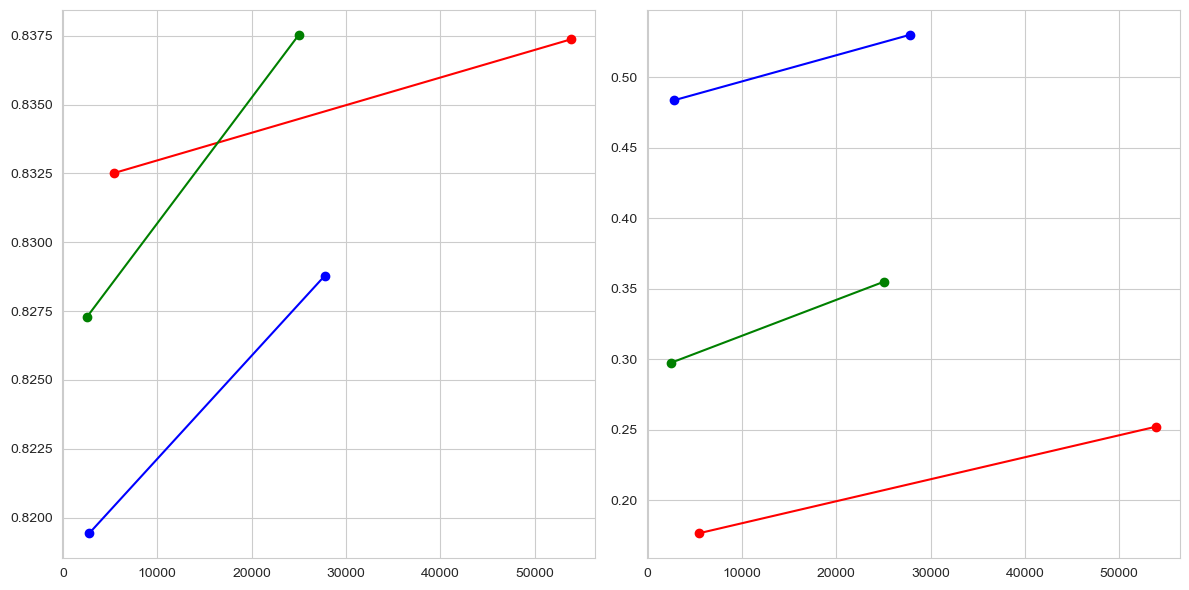

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i, dic in enumerate(dicts):
    var_dic = dic['variance_metrics']
    subset_sizes = [var_dic['subset_sizes'][0], var_dic['subset_sizes'][-1]]
    min_max_r2 = [var_dic['r2_values'][0], var_dic['r2_values'][-1]]

    mod_dic = dic['modelling_metrics']
    min_max_acc = [mod_dic['test_losses'][-1], mod_dic['test_losses'][0]]

    axs[0].plot(subset_sizes, min_max_r2, marker='o', color=color[i])
    axs[1].plot(subset_sizes, min_max_acc, marker='o', color=color[i])
plt.tight_layout()
plt.show()

In [6]:
imdb_df = pd.read_csv('./analysis_results/imdb_bert.csv')
tweet_eval_df = pd.read_csv('./analysis_results/tweet_eval_bert.csv')
sst2_df = pd.read_csv('./analysis_results/sst2_bert.csv')

In [9]:
imdb_df['percent'] = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
tweet_eval_df['percent'] = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
sst2_df['percent'] = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']

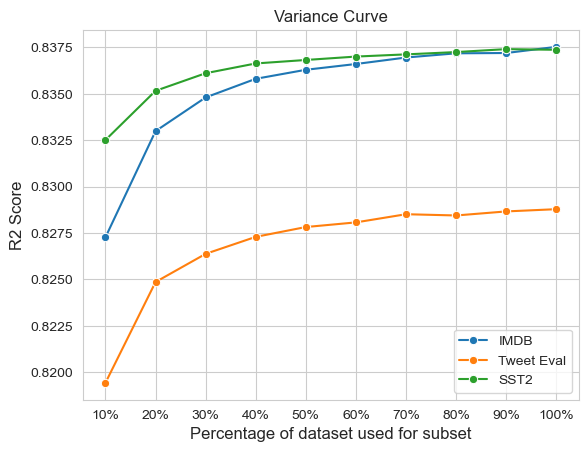

In [55]:
sns.lineplot(x=imdb_df['percent'], y=imdb_df['r2_value'], marker='o')
sns.lineplot(x=tweet_eval_df['percent'], y=tweet_eval_df['r2_value'], marker='o')
sns.lineplot(x=sst2_df['percent'], y=sst2_df['r2_value'], marker='o')


plt.gca().set_xlabel('Percentage of dataset used for subset', fontsize=12)
plt.gca().set_ylabel('R2 Score', fontsize=12)

plt.title('Variance Curve')
plt.legend(['IMDB', 'Tweet Eval', 'SST2'], loc='lower right')

plt.savefig("./analysis_results/plots/bert_variance_analysis.png", dpi=600, bbox_inches='tight')

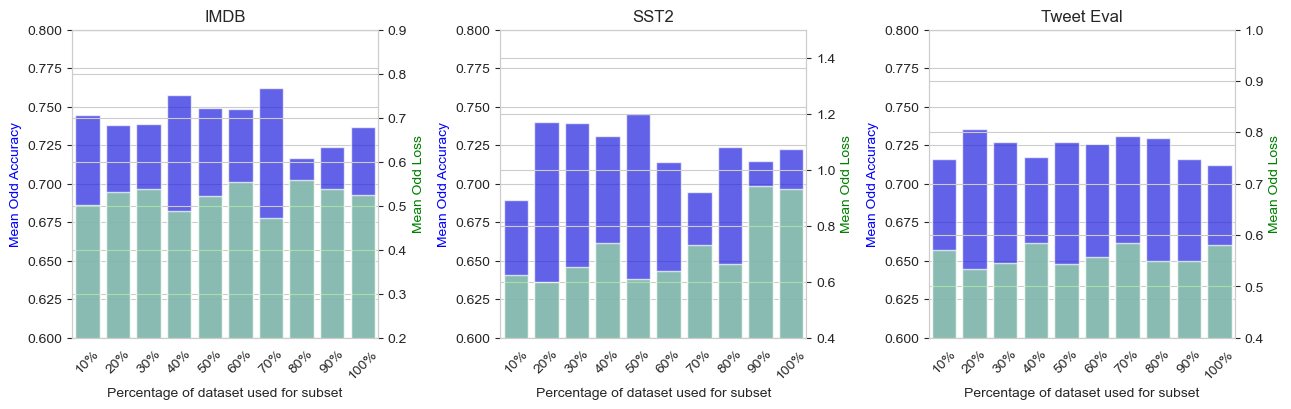

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

plot = sns.barplot(x=imdb_df['percent'], y=imdb_df['mean_odd_accuracy'], alpha=0.7, color='blue', ax=axes[0])
plot.set_ylim(0.6, 0.8)
ax1 = axes[0].twinx()
plot = sns.barplot(x=imdb_df['percent'], y=imdb_df['mean_odd_loss'], alpha=0.7, color='lightgreen', ax=ax1)
ax1.set_ylim(0.2, 0.9)
axes[0].set_title('IMDB')

plot = sns.barplot(x=sst2_df['percent'], y=sst2_df['mean_odd_accuracy'], alpha=0.7, color='blue', ax=axes[1])
plot.set_ylim(0.6, 0.8)
ax2 = axes[1].twinx()
plot = sns.barplot(x=sst2_df['percent'], y=sst2_df['mean_odd_loss'], alpha=0.7, color='lightgreen', ax=ax2)
ax2.set_ylim(0.4, 1.5)
axes[1].set_title('SST2')

plot = sns.barplot(x=tweet_eval_df['percent'], y=tweet_eval_df['mean_odd_accuracy'], alpha=0.7, color='blue', ax=axes[2])
plot.set_ylim(0.6, 0.8)
ax3 = axes[2].twinx()
plot = sns.barplot(x=tweet_eval_df['percent'], y=tweet_eval_df['mean_odd_loss'], alpha=0.7, color='lightgreen', ax=ax3)
ax3.set_ylim(0.4, 1.0)
axes[2].set_title('Tweet Eval')

for ax in [axes[0], ax1, axes[1], ax2, axes[2], ax3]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.subplots_adjust(wspace=0.4)

axes[0].yaxis.label.set_color('blue')
ax1.yaxis.label.set_color('green')
axes[1].yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('green')
axes[2].yaxis.label.set_color('blue')
ax3.yaxis.label.set_color('green')

for ax in [axes[0], ax1, axes[1], ax2, axes[2], ax3]:
    ax.set_xlabel('Percentage of dataset used for subset')
    ax.set_ylabel(ax.get_ylabel().replace('_', ' ').title())

plt.savefig("./plots/bert_odd.png", dpi=600, bbox_inches='tight')


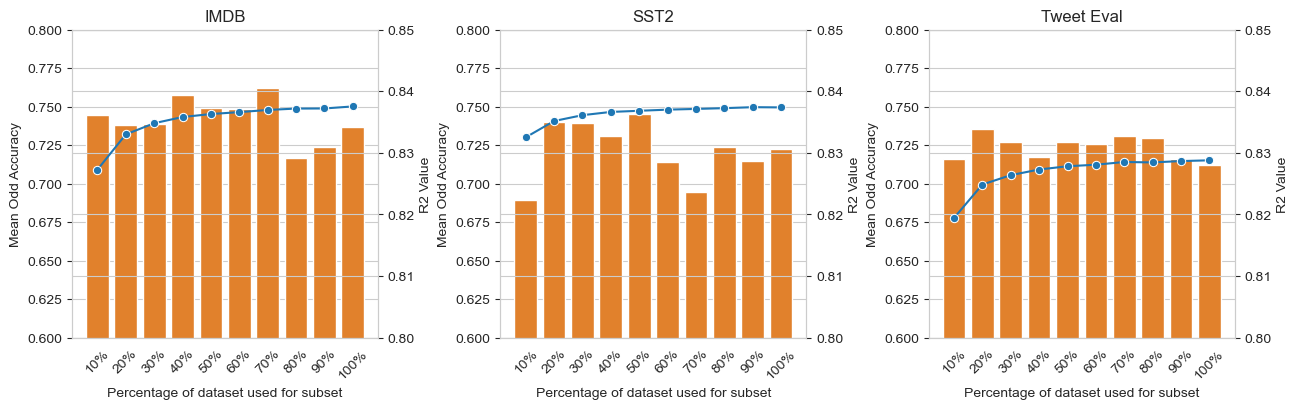

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

color = sns.color_palette("tab10")[1]
color2 = sns.color_palette("tab10")[0]


plot = sns.barplot(x=imdb_df['percent'], y=imdb_df['mean_odd_accuracy'], ax=axes[0], color=color)
plot.set_ylim(0.6, 0.8)
ax1 = axes[0].twinx()
plot = sns.lineplot(x=imdb_df['percent'], y=imdb_df['r2_value'], marker='o', ax=ax1, color=color2)
plot.set_ylim(0.8, 0.85)
axes[0].set_title('IMDB')

plot = sns.barplot(x=sst2_df['percent'], y=sst2_df['mean_odd_accuracy'], ax=axes[1], color=color)
plot.set_ylim(0.6, 0.8)
ax2 = axes[1].twinx()
plot = sns.lineplot(x=sst2_df['percent'], y=sst2_df['r2_value'], marker='o', ax=ax2, color=color2)
plot.set_ylim(0.8, 0.85)
axes[1].set_title('SST2')

plot = sns.barplot(x=tweet_eval_df['percent'], y=tweet_eval_df['mean_odd_accuracy'], ax=axes[2], color=color)
plot.set_ylim(0.6, 0.8)
ax3 = axes[2].twinx()
plot = sns.lineplot(x=tweet_eval_df['percent'], y=tweet_eval_df['r2_value'], marker='o', ax=ax3, color=color2)
plot.set_ylim(0.8, 0.85)
axes[2].set_title('Tweet Eval')

for ax in [axes[0], ax1, axes[1], ax2, axes[2], ax3]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.subplots_adjust(wspace=0.4)

for ax in [axes[0], ax1, axes[1], ax2, axes[2], ax3]:
    ax.set_xlabel('Percentage of dataset used for subset')
    ax.set_ylabel(ax.get_ylabel().replace('_', ' ').title())

plt.savefig("./analysis_results/plots/bert_odd_only_acc.png", dpi=600, bbox_inches='tight')

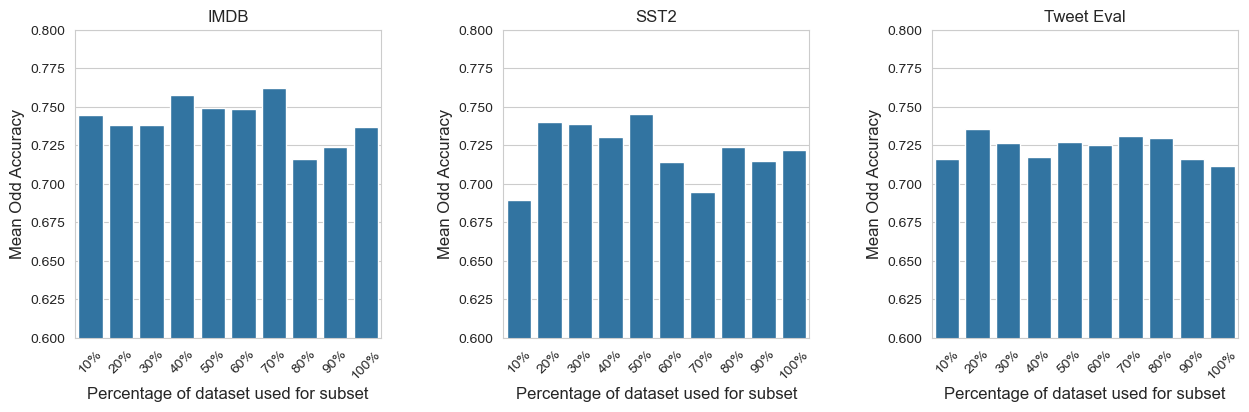

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

color = sns.color_palette("tab10")[0]
color2 = sns.color_palette("tab10")[0]


plot = sns.barplot(x=imdb_df['percent'], y=imdb_df['mean_odd_accuracy'], ax=axes[0], color=color)
plot.set_ylim(0.6, 0.8)
axes[0].set_title('IMDB')

plot = sns.barplot(x=sst2_df['percent'], y=sst2_df['mean_odd_accuracy'], ax=axes[1], color=color)
plot.set_ylim(0.6, 0.8)
axes[1].set_title('SST2')

plot = sns.barplot(x=tweet_eval_df['percent'], y=tweet_eval_df['mean_odd_accuracy'], ax=axes[2], color=color)
plot.set_ylim(0.6, 0.8)
axes[2].set_title('Tweet Eval')

for ax in [axes[0], ax1, axes[1], ax2, axes[2], ax3]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.subplots_adjust(wspace=0.4)

for ax in [axes[0], ax1, axes[1], ax2, axes[2], ax3]:
    ax.set_xlabel('Percentage of dataset used for subset', fontsize=12)
    ax.set_ylabel(ax.get_ylabel().replace('_', ' ').title(), fontsize=12)

plt.savefig("./analysis_results/plots/bert_odd_only_acc.png", dpi=600, bbox_inches='tight')